# Test PDPbox with multiclass classification problem
## Kaggle Otto Group with RandomForest
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### read training set

In [2]:
otto_raw = pd.read_csv('otto_train.csv')

In [3]:
otto_raw.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
otto_raw['target'] = otto_raw['target'].apply(lambda x : int(x.split('_')[1])-1)
otto_train = otto_raw.drop(['id', 'target'], axis=1)

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp

In [7]:
rf = RandomForestClassifier(n_estimators=100, max_features=50, n_jobs=4, random_state=24)
%time rf.fit(otto_train, otto_raw['target'])

Wall time: 38.1 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

## test PDPbox

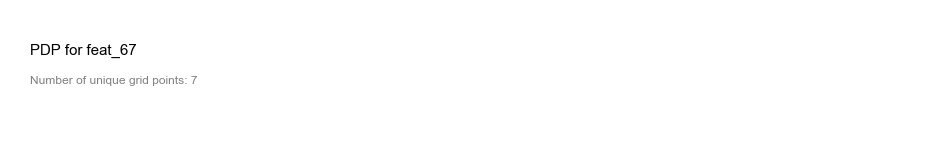

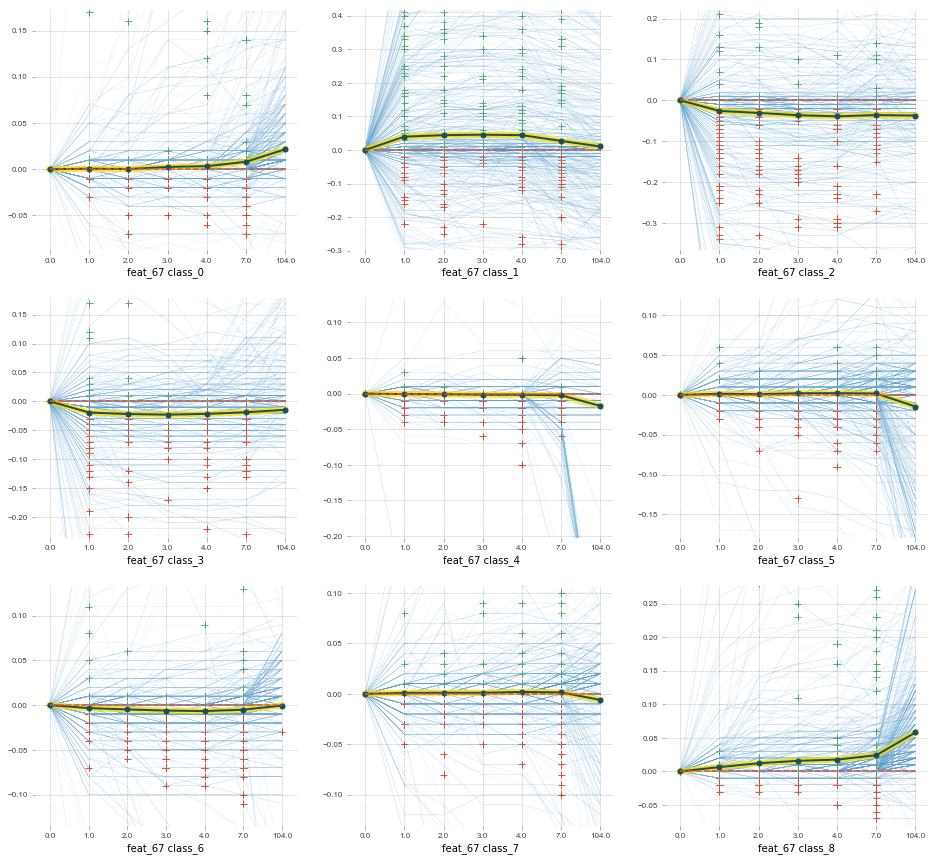

In [8]:
pdp_feat_67_rf = pdp.pdp_isolate(rf, otto_train, 'feat_67')
pdp.pdp_plot(pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=3, 
             plot_org_pts=True, plot_lines=True, frac_to_plot=0.01)

### interaction between feat_67 and feat_24

In [9]:
pdp_67_24_rf = pdp.pdp_interact(rf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10], 
                                percentile_ranges=[None, None])

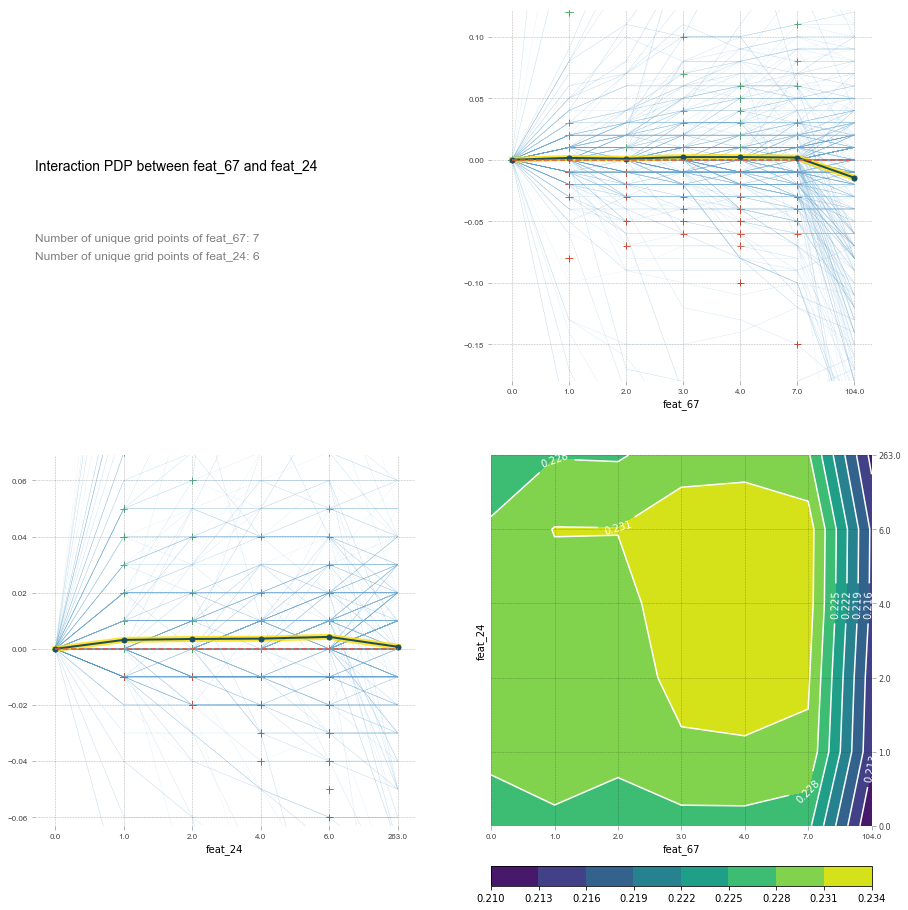

In [10]:
pdp.pdp_interact_plot(pdp_67_24_rf, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
            frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)